In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.random import randn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Internship\Cause-of-Death--1-\archive\cause_of_deaths dataset.csv')
df 

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,Zimbabwe,ZWE,2015,1439,754,215,3019,2518,770,1302,...,3176,2108,381,2990,2373,2751,1956,4202,632,146
6116,Zimbabwe,ZWE,2016,1457,767,219,3056,2050,801,1342,...,3259,2160,393,3027,2436,2788,1962,4264,648,146
6117,Zimbabwe,ZWE,2017,1460,781,223,2990,2116,818,1363,...,3313,2196,398,2962,2473,2818,2007,4342,654,144
6118,Zimbabwe,ZWE,2018,1450,795,227,2918,2088,825,1396,...,3381,2240,400,2890,2509,2849,2030,4377,657,139


In [3]:
df.shape

(6120, 34)

In [4]:
df.size

208080

In [5]:
df.isnull().sum()

Country/Territory                             0
Code                                          0
Year                                          0
Meningitis                                    0
Alzheimer's Disease and Other Dementias       0
Parkinson's Disease                           0
Nutritional Deficiencies                      0
Malaria                                       0
Drowning                                      0
Interpersonal Violence                        0
Maternal Disorders                            0
HIV/AIDS                                      0
Drug Use Disorders                            0
Tuberculosis                                  0
Cardiovascular Diseases                       0
Lower Respiratory Infections                  0
Neonatal Disorders                            0
Alcohol Use Disorders                         0
Self-harm                                     0
Exposure to Forces of Nature                  0
Diarrheal Diseases                      

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

In [7]:
df.describe()

,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
count,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,...,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6.120000e+03,6120.000000,6120.000000,6120.000000,6120.000000
mean,2004.500000,1719.701307,4864.189379,1173.169118,2253.600000,4140.960131,1683.333170,2083.797222,1262.589216,5941.898529,...,5138.704575,4724.132680,425.013399,1965.994281,5930.795588,1.709237e+04,6124.072059,10725.267157,588.711438,618.429902
std,8.656149,6672.006930,18220.659072,4616.156238,10483.633601,18427.753137,8877.018366,6917.006075,6057.973183,21011.962487,...,16773.081040,16470.429969,2022.640521,8255.999063,24097.784291,1.051572e+05,20688.118580,37228.051096,2128.595120,4186.023497
min,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1997.000000,15.000000,90.000000,27.000000,9.000000,0.000000,34.000000,40.000000,5.000000,11.000000,...,236.000000,145.750000,6.000000,5.000000,174.750000,2.890000e+02,154.000000,284.000000,17.000000,2.000000
50%,2004.500000,109.000000,666.500000,164.000000,119.000000,0.000000,177.000000,265.000000,54.000000,136.000000,...,1087.000000,822.000000,52.500000,92.000000,966.500000,1.689000e+03,1210.000000,2185.000000,126.000000,15.000000
75%,2012.000000,847.250000,2456.250000,609.250000,1167.250000,393.000000,698.000000,877.000000,734.000000,1879.000000,...,2954.000000,2922.500000,254.000000,1042.500000,3435.250000,5.249750e+03,3547.250000,6080.000000,450.000000,160.000000
max,2019.000000,98358.000000,320715.000000,76990.000000,268223.000000,280604.000000,153773.000000,69640.000000,107929.000000,305491.000000,...,273089.000000,222922.000000,30883.000000,202241.000000,329237.000000,1.366039e+06,270037.000000,464914.000000,25876.000000,64305.000000


In [8]:
df.Year.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [9]:
df.columns

Index(['Country/Territory', 'Code', 'Year', 'Meningitis',
       'Alzheimer's Disease and Other Dementias', 'Parkinson's Disease',
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis'],
      dtype='object')

In [10]:
df.Code.unique()

array(['AFG', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'ATG', 'ARG', 'ARM',
       'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL',
       'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN',
       'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CAF', 'TCD',
       'CHL', 'CHN', 'COL', 'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV',
       'CUB', 'CYP', 'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU',
       'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FJI', 'FIN',
       'FRA', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRL', 'GRD',
       'GUM', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HUN', 'ISL',
       'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN',
       'JOR', 'KAZ', 'KEN', 'KIR', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN',
       'LSO', 'LBR', 'LBY', 'LTU', 'LUX', 'MDG', 'MWI', 'MYS', 'MDV',
       'MLI', 'MLT', 'MHL', 'MRT', 'MUS', 'MEX', 'FSM', 'MDA', 'MCO',
       'MNG', 'MNE', 'MAR', 'MOZ', 'MMR', 'NAM', 'NRU', 'NPL', 'NLD',
       'NZL', 'NIC',

In [11]:
df.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


In [12]:
df.tail()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
6115,Zimbabwe,ZWE,2015,1439,754,215,3019,2518,770,1302,...,3176,2108,381,2990,2373,2751,1956,4202,632,146
6116,Zimbabwe,ZWE,2016,1457,767,219,3056,2050,801,1342,...,3259,2160,393,3027,2436,2788,1962,4264,648,146
6117,Zimbabwe,ZWE,2017,1460,781,223,2990,2116,818,1363,...,3313,2196,398,2962,2473,2818,2007,4342,654,144
6118,Zimbabwe,ZWE,2018,1450,795,227,2918,2088,825,1396,...,3381,2240,400,2890,2509,2849,2030,4377,657,139
6119,Zimbabwe,ZWE,2019,1450,812,232,2884,2068,827,1434,...,3460,2292,405,2855,2554,2891,2065,4437,662,136


In [13]:
df=df.drop('Country/Territory',axis=1)
df

,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,AFG,1990,2159,1116,371,2087,93,1370,1538,2655,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,AFG,1991,2218,1136,374,2153,189,1391,2001,2885,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,AFG,1992,2475,1162,378,2441,239,1514,2299,3315,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,AFG,1993,2812,1187,384,2837,108,1687,2589,3671,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,AFG,1994,3027,1211,391,3081,211,1809,2849,3863,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,ZWE,2015,1439,754,215,3019,2518,770,1302,1355,...,3176,2108,381,2990,2373,2751,1956,4202,632,146
6116,ZWE,2016,1457,767,219,3056,2050,801,1342,1338,...,3259,2160,393,3027,2436,2788,1962,4264,648,146
6117,ZWE,2017,1460,781,223,2990,2116,818,1363,1312,...,3313,2196,398,2962,2473,2818,2007,4342,654,144
6118,ZWE,2018,1450,795,227,2918,2088,825,1396,1294,...,3381,2240,400,2890,2509,2849,2030,4377,657,139


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
lb=LabelEncoder()

In [16]:
df1=lb.fit_transform(df['Code'])
pd.Series(df1)

0         0
1         0
2         0
3         0
4         0
       ... 
6115    203
6116    203
6117    203
6118    203
6119    203
Length: 6120, dtype: int32

In [17]:
df['Code']=df1
df

,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,0,1990,2159,1116,371,2087,93,1370,1538,2655,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,0,1991,2218,1136,374,2153,189,1391,2001,2885,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,0,1992,2475,1162,378,2441,239,1514,2299,3315,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,0,1993,2812,1187,384,2837,108,1687,2589,3671,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,0,1994,3027,1211,391,3081,211,1809,2849,3863,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,203,2015,1439,754,215,3019,2518,770,1302,1355,...,3176,2108,381,2990,2373,2751,1956,4202,632,146
6116,203,2016,1457,767,219,3056,2050,801,1342,1338,...,3259,2160,393,3027,2436,2788,1962,4264,648,146
6117,203,2017,1460,781,223,2990,2116,818,1363,1312,...,3313,2196,398,2962,2473,2818,2007,4342,654,144
6118,203,2018,1450,795,227,2918,2088,825,1396,1294,...,3381,2240,400,2890,2509,2849,2030,4377,657,139


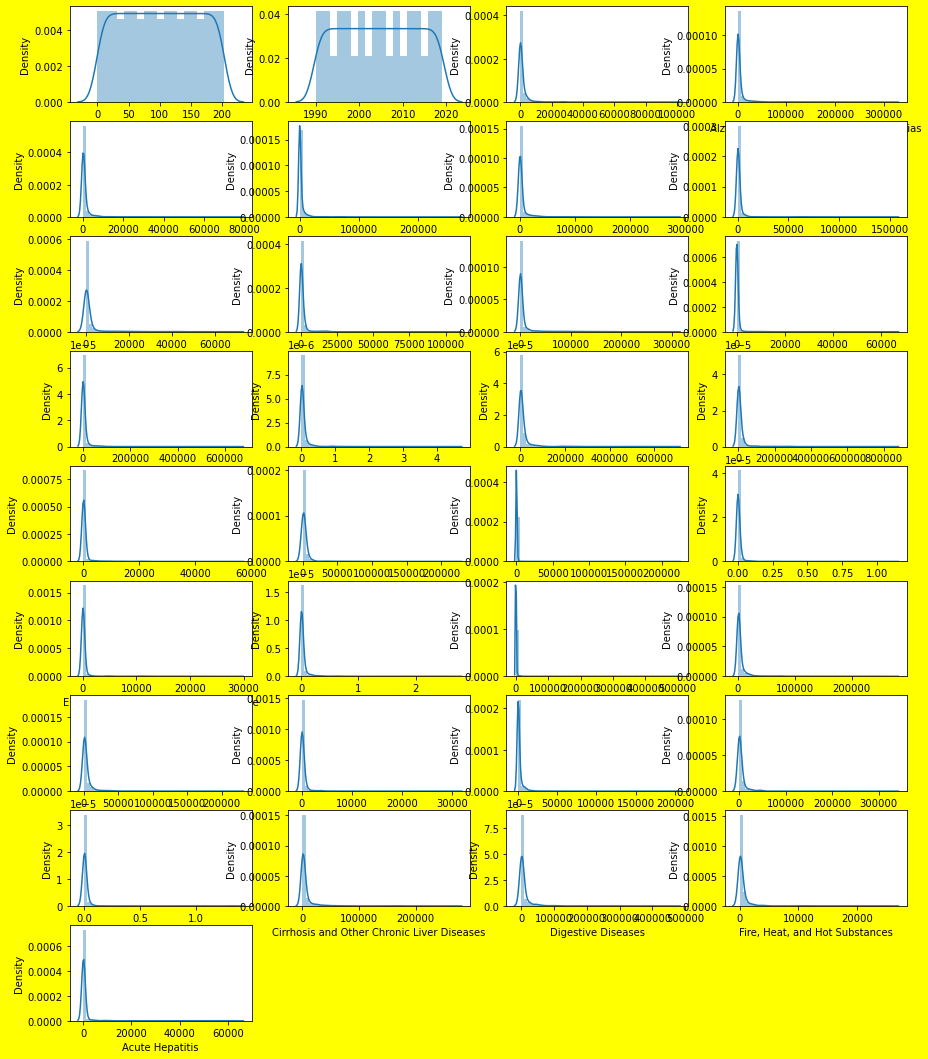

In [18]:
plt.figure(figsize=(15,25),facecolor='yellow')
plotnumber=1
for column in df:
    if plotnumber<=35:
        ax=plt.subplot(12,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        plotnumber+=1
plt.show()

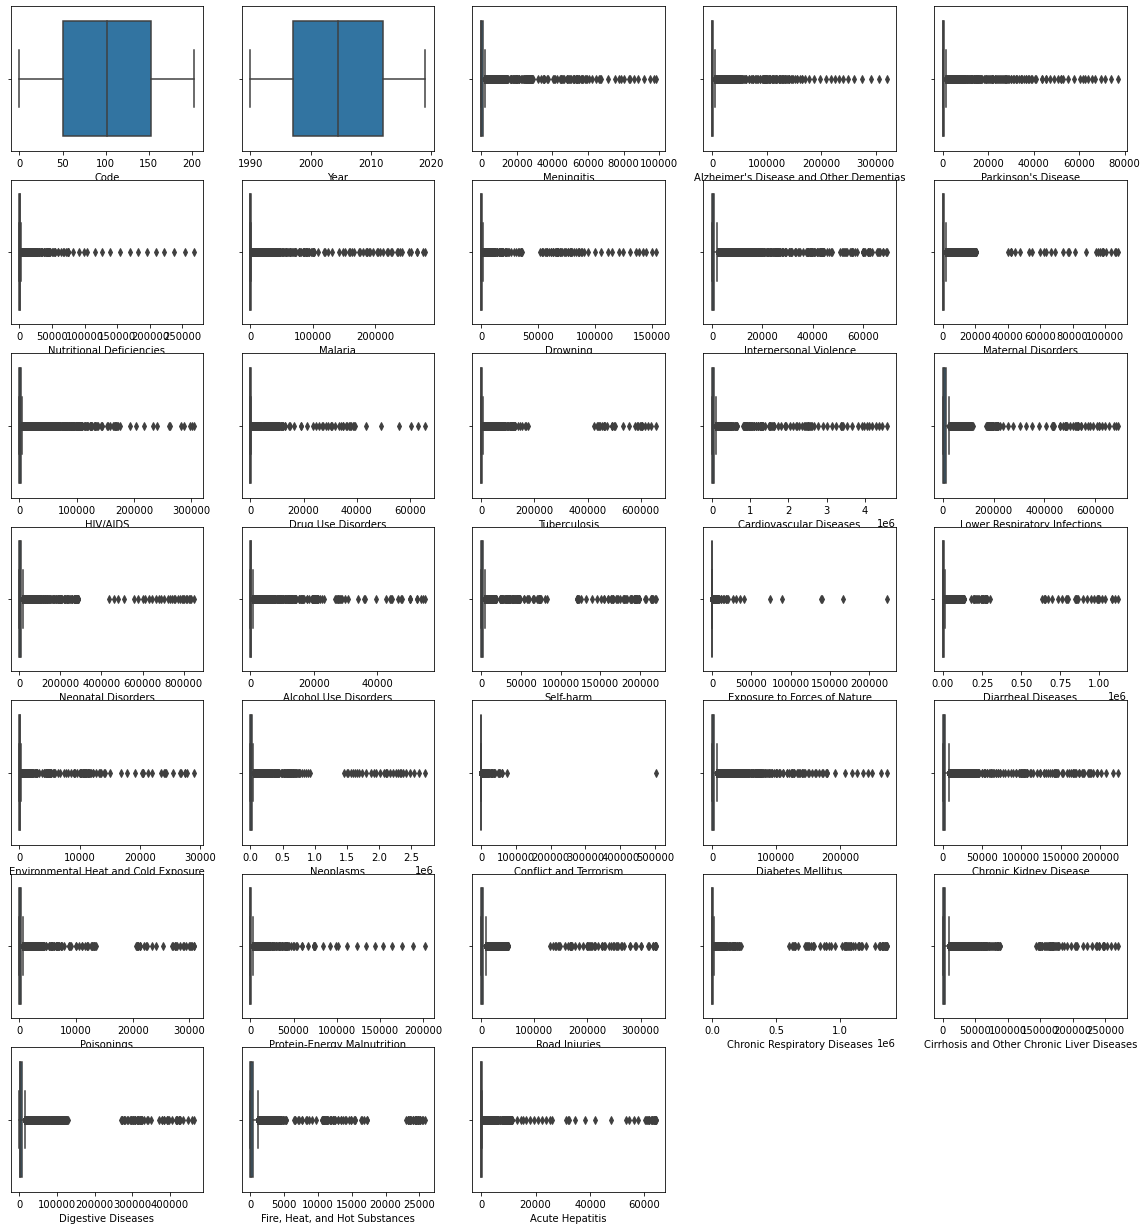

In [19]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in df:
    if plotnumber<=35:
        ax=plt.subplot(8,5,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column)
        plotnumber+=1
plt.show() 

In [20]:
df.describe()

,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
count,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,...,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6.120000e+03,6120.000000,6120.000000,6120.000000,6120.000000
mean,101.500000,2004.500000,1719.701307,4864.189379,1173.169118,2253.600000,4140.960131,1683.333170,2083.797222,1262.589216,...,5138.704575,4724.132680,425.013399,1965.994281,5930.795588,1.709237e+04,6124.072059,10725.267157,588.711438,618.429902
std,58.893832,8.656149,6672.006930,18220.659072,4616.156238,10483.633601,18427.753137,8877.018366,6917.006075,6057.973183,...,16773.081040,16470.429969,2022.640521,8255.999063,24097.784291,1.051572e+05,20688.118580,37228.051096,2128.595120,4186.023497
min,0.000000,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50.750000,1997.000000,15.000000,90.000000,27.000000,9.000000,0.000000,34.000000,40.000000,5.000000,...,236.000000,145.750000,6.000000,5.000000,174.750000,2.890000e+02,154.000000,284.000000,17.000000,2.000000
50%,101.500000,2004.500000,109.000000,666.500000,164.000000,119.000000,0.000000,177.000000,265.000000,54.000000,...,1087.000000,822.000000,52.500000,92.000000,966.500000,1.689000e+03,1210.000000,2185.000000,126.000000,15.000000
75%,152.250000,2012.000000,847.250000,2456.250000,609.250000,1167.250000,393.000000,698.000000,877.000000,734.000000,...,2954.000000,2922.500000,254.000000,1042.500000,3435.250000,5.249750e+03,3547.250000,6080.000000,450.000000,160.000000
max,203.000000,2019.000000,98358.000000,320715.000000,76990.000000,268223.000000,280604.000000,153773.000000,69640.000000,107929.000000,...,273089.000000,222922.000000,30883.000000,202241.000000,329237.000000,1.366039e+06,270037.000000,464914.000000,25876.000000,64305.000000


<AxesSubplot:xlabel='Year', ylabel='Meningitis'>

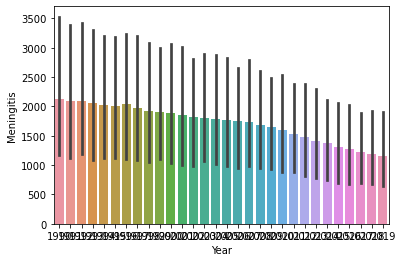

In [27]:
sns.barplot(x="Year",y='Meningitis',data=df)

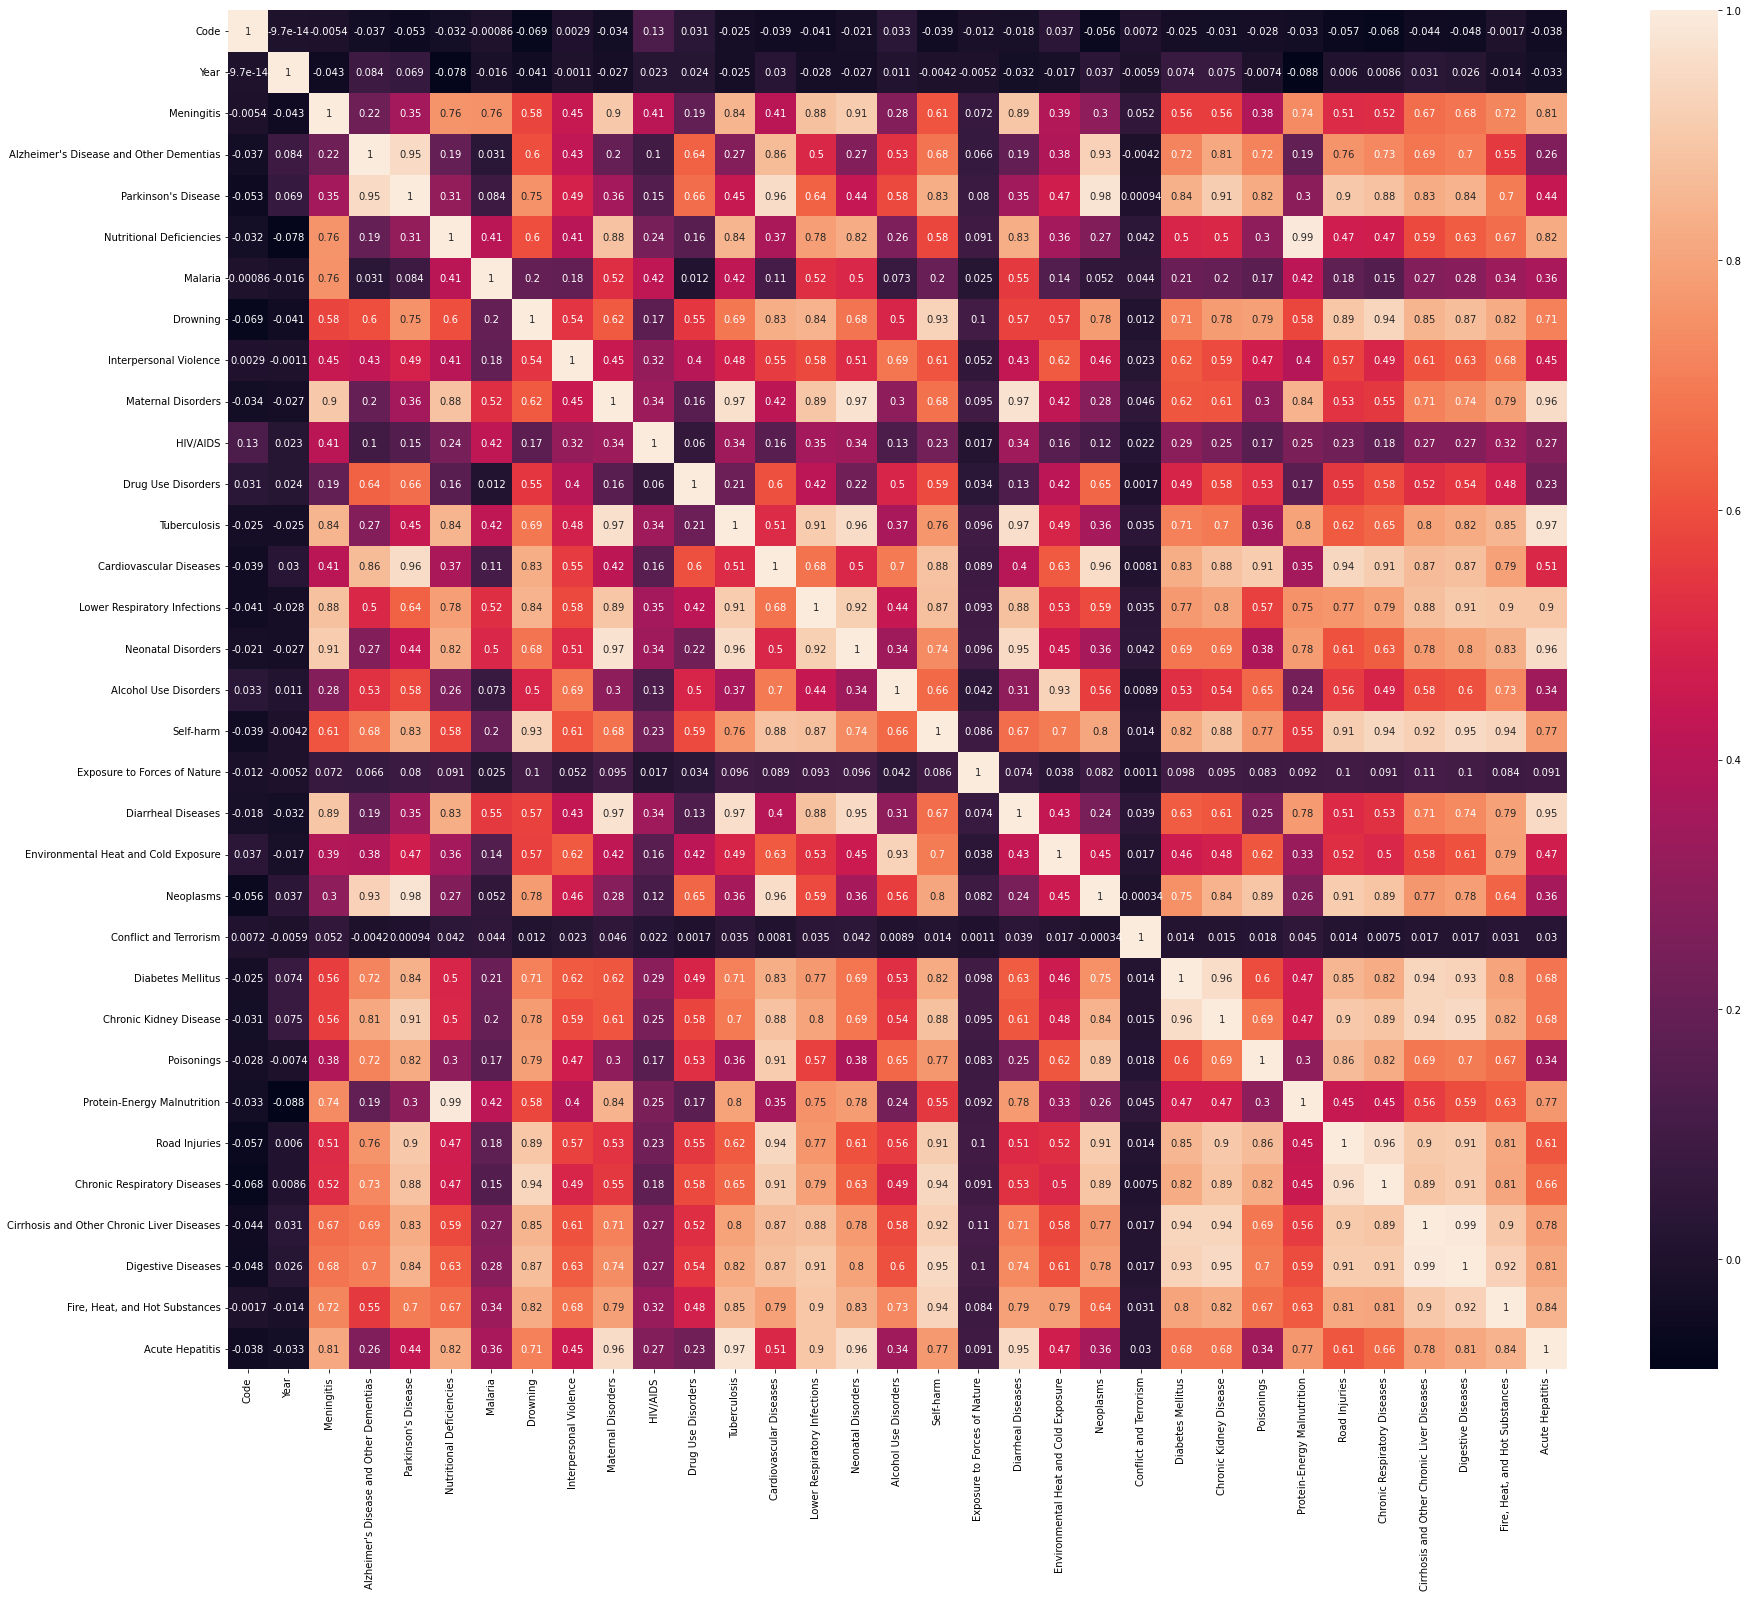

In [28]:
cor=df.corr()
plt.figure(figsize=(30,25))
sns.heatmap(cor,annot=True)
plt.show()

<AxesSubplot:xlabel='Protein-Energy Malnutrition', ylabel="Alzheimer's Disease and Other Dementias">

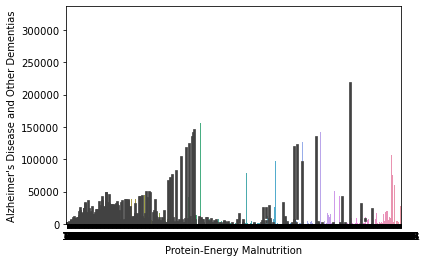

In [30]:
sns.barplot(x="Protein-Energy Malnutrition",y="Alzheimer's Disease and Other Dementias",data=df)